In [1]:
! rm -rf tools_classifier
! git clone https://github.com/zRafaF/tools_classifier

Cloning into 'tools_classifier'...
remote: Enumerating objects: 592, done.
remote: Counting objects: 100% (249/249), done.
remote: Compressing objects: 100% (239/239), done.
remote: Total 592 (delta 11), reused 243 (delta 8), pack-reused 343 (from 1)
Receiving objects: 100% (592/592), 155.82 MiB | 11.21 MiB/s, done.
Resolving deltas: 100% (33/33), done.
Updating files: 100% (665/665), done.


In [42]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage import io
from skimage.color import rgb2gray

from google.colab.patches import cv2_imshow

In [43]:
DATA_SET_PATH = './tools_classifier/data_set/ground_truth_binary'

In [44]:
# Load image

def calc_bbox(img):
    bbox = 0, 0, 0, 0
    ret, thresh = cv2.threshold(img, 127, 255, 0)

    contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    cnt = contours[0]

    # Calculando a bounding box
    x, y, w, h = cv2.boundingRect(cnt)
    bbox = x, x + w, y, y + h

    return bbox




In [46]:
test_img = io.imread(os.path.join(DATA_SET_PATH, "cutting_pliers", "2-01-V1-B.png"))

calculated_bbox = calc_bbox(test_img)

print(calculated_bbox)

(116, 391, 154, 358)


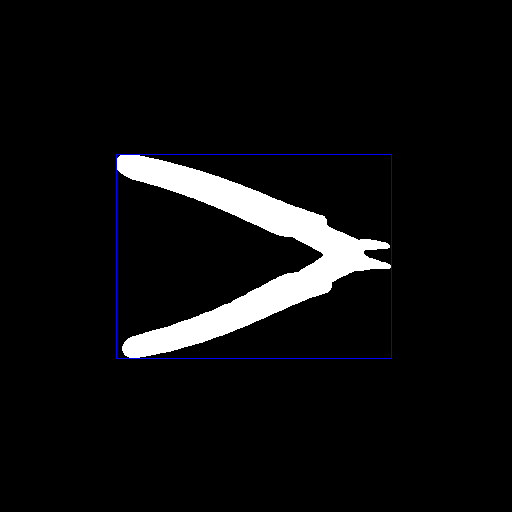

In [47]:
test_img_colored = cv2.cvtColor(test_img, cv2.COLOR_GRAY2BGR)

cv2.rectangle(test_img_colored,
  (calculated_bbox[0], calculated_bbox[2]),
  (calculated_bbox[1], calculated_bbox[3]),
  (255, 0, 0), 1)
cv2_imshow(test_img_colored)

## Gerando para todas as imagens

In [54]:
def generate_bounding_boxes(data_set_path):
  bboxes = []
  for dir in os.listdir(DATA_SET_PATH):
      data_set_dir = os.path.join(DATA_SET_PATH, dir)

      for filename in os.listdir(data_set_dir):
        if filename.endswith('.png'):
            img_path = os.path.join(data_set_dir, filename)
            image = io.imread(img_path)
            bbox = calc_bbox(image)
            bboxes.append({
                "class": dir,
                "filename": filename,
                "bbox": bbox
            })
  return bboxes

def filter_bbox(bounding_boxes, img_class, img_filename):
    for bbox in bounding_boxes:
        if bbox['class'] == img_class:
            if bbox['filename'] == img_filename:
              return bbox['bbox']

In [51]:
bboxes = generate_bounding_boxes(DATA_SET_PATH)
print(bboxes)

# save bboxes as json

import json
with open('bounding_boxes.json', 'w') as f:
    json.dump(bboxes, f)

[{'class': 'clamp', 'filename': '1-01-V2-W.png', 'bbox': (135, 426, 171, 396)}, {'class': 'clamp', 'filename': '1-01-V1-W.png', 'bbox': (136, 415, 135, 357)}, {'class': 'clamp', 'filename': '1-01-V1-B.png', 'bbox': (86, 380, 77, 324)}, {'class': 'clamp', 'filename': '1-01-V2-B.png', 'bbox': (102, 398, 101, 326)}, {'class': 'wrench', 'filename': '9-01-V2-W.png', 'bbox': (133, 396, 168, 344)}, {'class': 'wrench', 'filename': '9-01-V2-B.png', 'bbox': (130, 427, 232, 311)}, {'class': 'wrench', 'filename': '9-01-V1-B.png', 'bbox': (140, 424, 217, 344)}, {'class': 'wrench', 'filename': '9-01-V1-W.png', 'bbox': (142, 403, 166, 361)}, {'class': 'screw_driver', 'filename': '8-01-V2-B.png', 'bbox': (44, 471, 175, 400)}, {'class': 'screw_driver', 'filename': '8-01-V1-W.png', 'bbox': (135, 415, 169, 394)}, {'class': 'screw_driver', 'filename': '8-01-V1-B.png', 'bbox': (20, 477, 188, 342)}, {'class': 'screw_driver', 'filename': '8-01-V2-W.png', 'bbox': (152, 435, 148, 371)}, {'class': 'razor_knife'

# Apresentando uma bounding box por classe

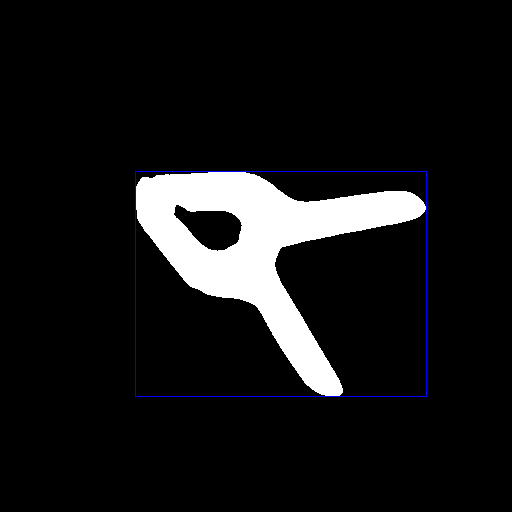

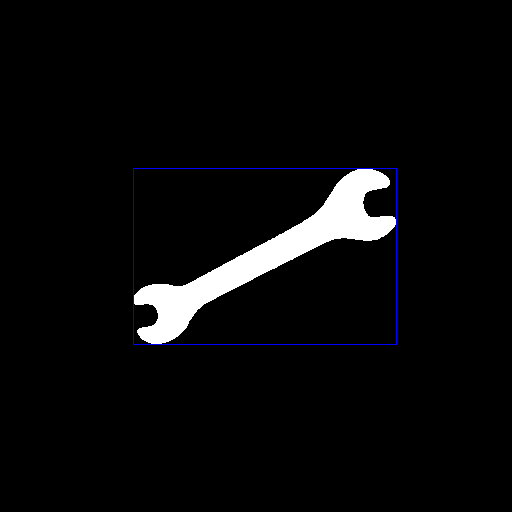

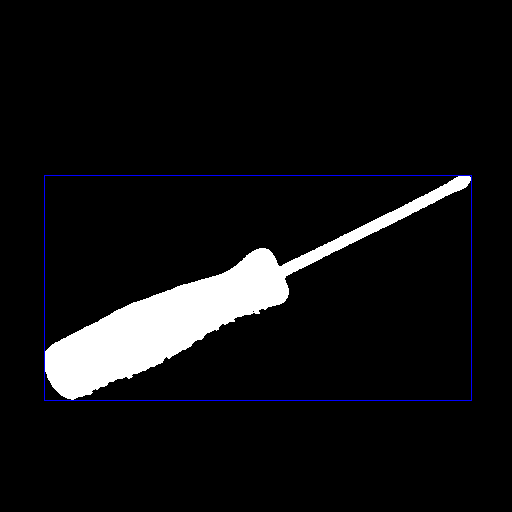

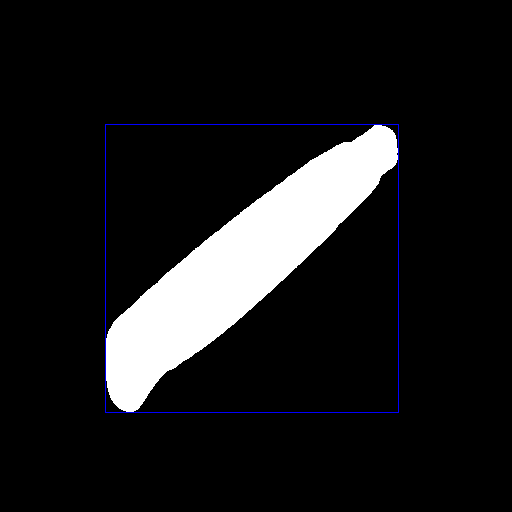

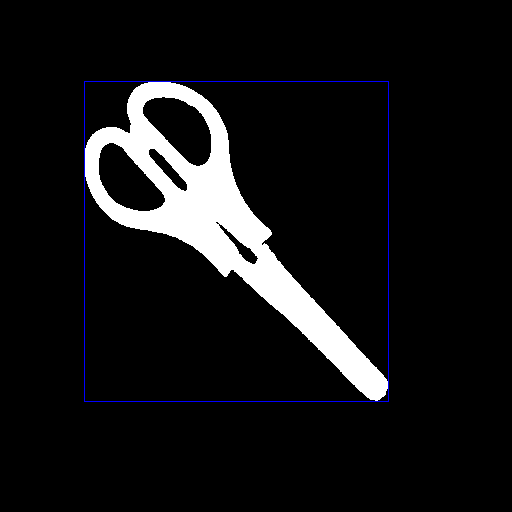

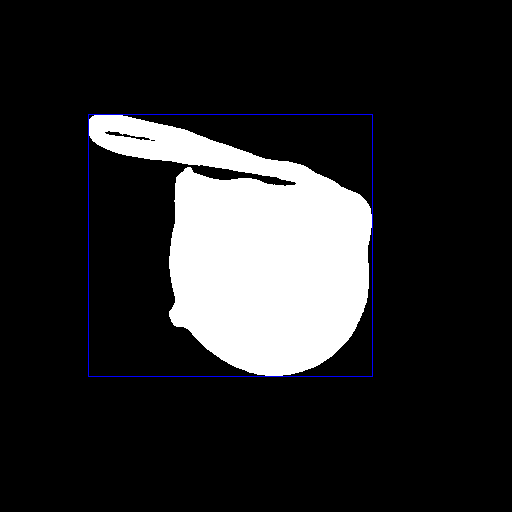

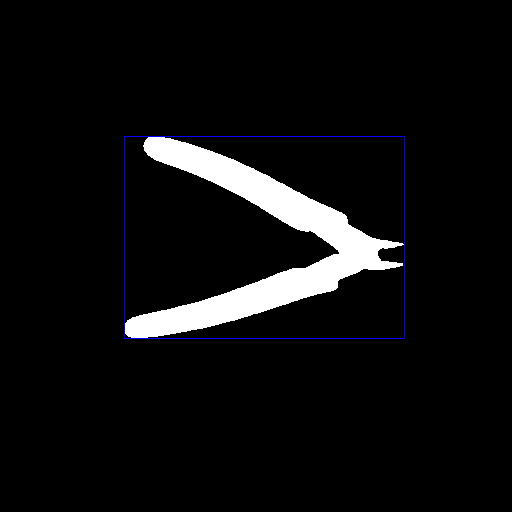

In [55]:
for dir in os.listdir(DATA_SET_PATH):
  data_set_dir = os.path.join(DATA_SET_PATH, dir)

  for filename in os.listdir(data_set_dir):
    if filename.endswith('.png'):
        img_path = os.path.join(data_set_dir, filename)
        image = io.imread(img_path)
        bbox = filter_bbox(bboxes, dir, filename)
        image_colored = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)
        cv2.rectangle(image_colored,
          (bbox[0], bbox[2]),
          (bbox[1], bbox[3]),
          (255, 0, 0), 1)
        cv2_imshow(image_colored)
        break